<a href="https://colab.research.google.com/github/junpito/collections-of-college-task/blob/main/ANN_praktikum_ai_120450086_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = np.loadtxt('/content/drive/MyDrive/praktikum/diabetes_data.csv',delimiter=',')
print(f'Dataset shape: {df.shape} \n')
print(df)

Dataset shape: (768, 9) 

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


Bagi data menjadi train dan test sebesar 80:20 dan definisikan prediktor dan prediksinya lalu
lihat dimensi data yang sudah dibagi.

In [ ]:
# split dataset into train and test with 80/20 proportion
X = df[:, :8]
y = df[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


Kemudian kita akan membangun ANN dengan 3 lapisan, input, hidden dan output. Dimana
digunakan 1 hidden layer disini. Dan besar input yang diberikan 12 nodes, sedangkan output
sebesar 1 nodes karena melakukan klasifikasi biner yaitu 0 dan 1.

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


Lakukan compile model

In [ ]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Lanjutkan dengan melakukan model.fit

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150,batch_size=16, verbose=0)

Setelah itu tampilkan visualisasi loss dan akurasi

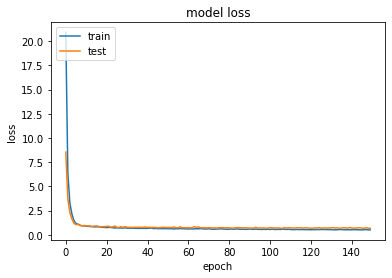

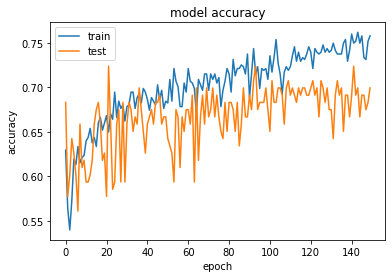

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Kita akan melakukan prediksi terhadap model yang sudah di train dengan fungsi predict pada
data train dan test

In [ ]:
y_train_pred = (model.predict(X_train) > 0.5).astype('int32')
y_test_pred = (model.predict(X_test) > 0.5).astype('int32')

5/5 [==============================] - 0s 2ms/step


Tampilkan hasil akurasinya

In [ ]:
print(accuracy_score(y_test,y_test_pred))
print(accuracy_score(y_train,y_train_pred))

0.7467532467532467
0.742671009771987


Tampilkan classification report dan confusion matrix

In [ ]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82       107
         1.0       0.58      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154

[[86 21]
 [18 29]]


#latihan 2

Pada latihan 2 ini Anda di tantang untuk melakukan klasifikasi dan prediksi (regeresi) terhadap
stabilitas termodinamika perovskite oxide, yaitu sebuah material oksida yang berstruktur
perovskite. Data terdiri dari 1929 instance perovskite oxide . Sebanyak 80 fitur telah dipilih
dari 962 fitur, pada dataset ini, untuk memudahkan proses komputasi. Fitur penting dibagi
dalam beberapa kategori kalkulasi DFT (Density Functional Theory), Elemental property table,
dan Shannon radius. Nilai Ehull pada fitur digunakan sebagai prediksi untuk menebak berapa
nilai Ehull jika pada kondisi yang berbeda terhadap kestabilan termodinamika perovskite
oxide.

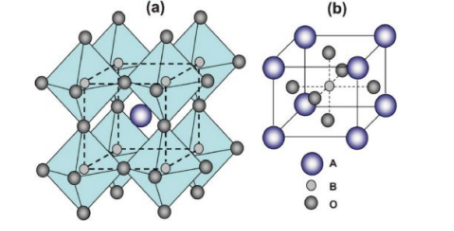

Gambar 7. (a) Corner-sharing (BO6) octahedral dengan satu ions yang berlokasi di 12-

koordinat. (b) B-site kation di tengah sel.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

read datset

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Perovskite_Stability_with_features.csv')
df1.head()

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,0,0,0,0,2,23,0,0,1,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,0,0,0,0,2,27,1,0,1,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,0,0,0,0,2,26,0,0,1,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,0,0,0,0,2,28,0,0,1,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,0,0,0,0,2,26,0,0,1,1


In [ ]:
df1.tail()

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,4,1.588513,...,0,0,0,1,2,23,0,0,0,1
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1928,Y8V8O24,Y,NaN,NaN,V,NaN,NaN,O,3,0.000000,...,0,0,0,1,2,23,0,0,0,1


##preprosessing

In [ ]:
df1.shape

(1929, 81)

data ini memiliki 1929 row dan 81 kolom

a. Periksa info dataset, terdiri dari jenis data apa saja?

In [ ]:
df1.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 81 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Material Composition                                 1929 non-null   object 
 1   A site #1                                            1929 non-null   object 
 2   A site #2                                            1161 non-null   object 
 3   A site #3                                            34 non-null     object 
 4   B site #1                                            1929 non-null   object 
 5   B site #2                                            1249 non-null   object 
 6   B site #3                                            33 non-null     object 
 7   X site                                               1929 non-null   object 
 8   Number of elements                                   1929 non-null  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.



b. Apakah terdapat data yang kosong pada setiap fitur?

In [ ]:
df1.isnull().sum()

Material Composition          0
A site #1                     0
A site #2                   768
A site #3                  1895
B site #1                     0
                           ... 
host_Bsite0_At. #             0
host_Bsite0_IsHexagonal       0
host_Bsite0_IsNoblegas        0
Asite_IsAlkali_max            0
Bsite_IsMetal_max             0
Length: 81, dtype: int64

In [ ]:
df1.isnull().values.sum()

5239

In [ ]:
len(df1.columns[df1.isnull().any()])

4

c. Deskripsikan statistik dataset

In [ ]:
df1.describe()

,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,Density_AB_avg,BCCefflatcnt_AB_avg,...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
count,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,...,1929.000000,1929.0,1929.0,1929.000000,1929.0,1929.000000,1929.000000,1929.0,1929.000000,1929.0
mean,4.284085,105.532633,-1.914460,6.100570,270.521830,59.640178,705.063867,0.960641,6.097906,7.310155,...,0.219285,0.0,0.0,0.354069,2.0,27.162779,0.303784,0.0,0.582167,1.0
std,0.535232,98.395552,0.570340,1.748812,116.946676,21.252029,56.529385,0.088519,1.112604,0.408719,...,0.413869,0.0,0.0,0.478354,0.0,8.238310,0.460010,0.0,0.493330,0.0
min,3.000000,0.000000,-3.208500,3.000000,99.870000,24.305000,577.600000,0.742500,2.882500,6.355729,...,0.000000,0.0,0.0,0.000000,2.0,12.000000,0.000000,0.0,0.000000,1.0
25%,4.000000,33.436112,-2.315473,4.000000,140.200000,51.996000,652.800000,0.893750,5.370000,6.958757,...,0.000000,0.0,0.0,0.000000,2.0,24.000000,0.000000,0.0,0.000000,1.0
50%,4.000000,84.202506,-1.900529,6.000000,332.630000,55.847000,717.400000,0.960000,6.043750,7.272569,...,0.000000,0.0,0.0,0.000000,2.0,26.000000,0.000000,0.0,1.000000,1.0
75%,5.000000,155.909864,-1.474341,8.000000,393.300000,58.933200,758.000000,1.017500,6.776875,7.602382,...,0.000000,0.0,0.0,1.000000,2.0,28.000000,1.000000,0.0,1.000000,1.0
max,6.000000,956.831956,-0.488125,8.000000,399.570000,195.080000,906.400000,1.255000,13.095000,9.050862,...,1.000000,0.0,0.0,1.000000,2.0,78.000000,1.000000,0.0,1.000000,1.0


d. Hapuslah fitur yang memiliki standard deviasi = 0 dan fitur berjenis object

In [ ]:
standar_dev = df1.std
standar_dev()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Number of elements                    0.535232
energy_above_hull (meV/atom)         98.395552
formation_energy (eV/atom)            0.570340
num_of_atoms_host_Asite0              1.748812
host_Asite0_Heat of Vaporization    116.946676
                                       ...    
host_Bsite0_At. #                     8.238310
host_Bsite0_IsHexagonal               0.460010
host_Bsite0_IsNoblegas                0.000000
Asite_IsAlkali_max                    0.493330
Bsite_IsMetal_max                     0.000000
Length: 73, dtype: float64

In [ ]:
threshold = 0.1

df3 = df2.drop(df2.std()[df2.std() < threshold].index.values, axis=1)


In [ ]:
 df3.std()

Number of elements                                       0.535232
energy_above_hull (meV/atom)                            98.395552
formation_energy (eV/atom)                               0.570340
num_of_atoms_host_Asite0                                 1.748812
host_Asite0_Heat of Vaporization                       116.946676
host_Bsite0_at. wt.                                     21.252029
host_Bsite0_Ionization Energy (kJ/mol)                  56.529385
Density_AB_avg                                           1.112604
BCCefflatcnt_AB_avg                                      0.408719
BCCvolume_padiff_AB_avg                                  0.318538
GSenergy_pa_AB_avg                                       1.010516
ICSDVolume_AB_avg                                        5.372311
covalent radius_AB_avg                                   0.110061
Ionization Energy (kJ/mol)_AB_avg                       33.296407
Electron Affinity (kJ/mol)_AB_avg                       37.636395
Atomic Vol

In [ ]:
d = df1.select_dtypes(include = "object").columns
d

Index(['Material Composition', 'A site #1', 'A site #2', 'A site #3',
       'B site #1', 'B site #2', 'B site #3', 'X site'],
      dtype='object')

In [ ]:
df2 =  df1.drop(df1[df1.select_dtypes(include = "object").columns], axis = 1)

In [ ]:
df2.select_dtypes(include = "object").columns

Index([], dtype='object')

In [ ]:
df3.select_dtypes(include = "object").columns

Index([], dtype='object')

##2


In [ ]:
df3.corr()

,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),Density_AB_avg,BCCefflatcnt_AB_avg,BCCvolume_padiff_AB_avg,...,Asite_NfValence_weighted_avg,Bsite_At. #_weighted_avg,Bsite_Period_weighted_avg,Bsite_NdUnfilled_weighted_avg,Bsite_NpUnfilled_weighted_avg,host_Asite0_IsBCC,host_Asite0_OrbitalD,host_Bsite0_At. #,host_Bsite0_IsHexagonal,Asite_IsAlkali_max
Number of elements,1.000000,0.385618,0.371040,-0.566932,-0.116712,0.094813,0.283811,0.058988,0.016113,-0.192653,...,-0.208547,0.153214,0.135759,-0.116912,-0.145412,0.123704,-0.068939,0.115605,0.032708,0.379060
energy_above_hull (meV/atom),0.385618,1.000000,0.692898,-0.333890,-0.316891,0.076022,0.326911,0.025674,0.032401,-0.273250,...,-0.200741,0.154442,0.068633,-0.341999,-0.029944,0.178185,-0.202330,0.108785,-0.144594,0.448025
formation_energy (eV/atom),0.371040,0.692898,1.000000,-0.291773,-0.395504,-0.008573,0.644546,0.200289,-0.104125,-0.310245,...,-0.276441,0.113213,-0.064301,-0.640192,-0.109564,0.209444,-0.284144,0.037775,-0.273288,0.534411
num_of_atoms_host_Asite0,-0.566932,-0.333890,-0.291773,1.000000,0.074916,0.002549,-0.195115,-0.062329,0.155704,0.087490,...,-0.189115,0.032709,0.059948,0.118950,0.044206,-0.019020,0.084514,-0.012549,0.006490,-0.314387
host_Asite0_Heat of Vaporization,-0.116712,-0.316891,-0.395504,0.074916,1.000000,-0.245841,-0.153189,0.222811,-0.590805,0.575548,...,0.218830,-0.289648,-0.304412,-0.042264,0.101949,-0.590744,0.792749,-0.248955,0.096967,-0.701481
host_Bsite0_at. wt.,0.094813,0.076022,-0.008573,0.002549,-0.245841,1.000000,0.016841,0.452018,0.371046,-0.063656,...,-0.073982,0.877837,0.817913,-0.008908,0.079409,0.398591,-0.159005,0.996916,0.050971,0.213684
host_Bsite0_Ionization Energy (kJ/mol),0.283811,0.326911,0.644546,-0.195115,-0.153189,0.016841,1.000000,0.383960,-0.245651,0.092159,...,-0.130396,0.104413,0.013218,-0.312194,-0.540267,0.159926,-0.104669,0.052010,-0.005180,0.255303
Density_AB_avg,0.058988,0.025674,0.200289,-0.062329,0.222811,0.452018,0.383960,1.000000,-0.294982,0.403024,...,0.315668,0.564890,0.441942,-0.294456,-0.106538,0.080640,0.037874,0.469987,-0.095073,-0.236292
BCCefflatcnt_AB_avg,0.016113,0.032401,-0.104125,0.155704,-0.590805,0.371046,-0.245651,-0.294982,1.000000,-0.316178,...,-0.260716,0.376135,0.460967,0.255026,0.118336,0.622846,-0.400558,0.357733,0.168616,0.517751
BCCvolume_padiff_AB_avg,-0.192653,-0.273250,-0.310245,0.087490,0.575548,-0.063656,0.092159,0.403024,-0.316178,1.000000,...,0.248847,-0.105243,-0.076402,0.105448,-0.198417,-0.022545,0.430653,-0.065148,0.180606,-0.555196


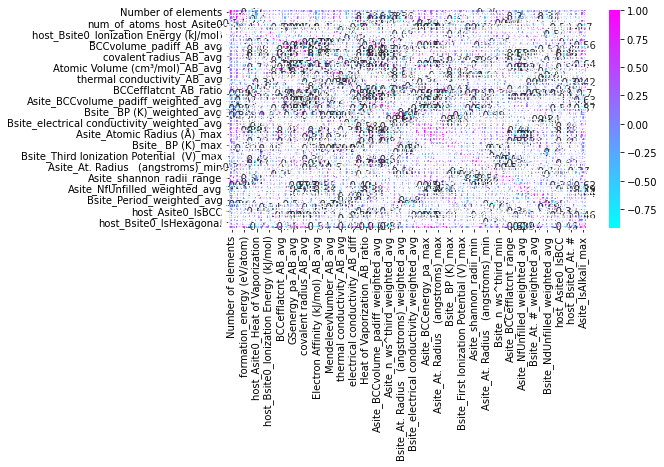

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df3.corr(), annot=True, cmap='cool')
plt.show()

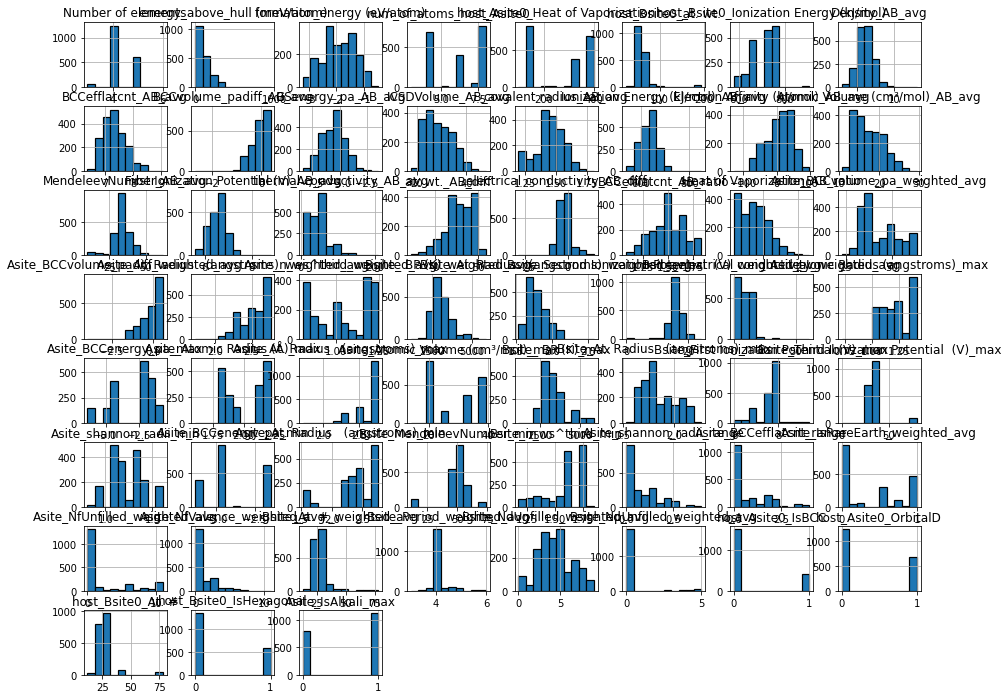

In [ ]:
df3.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(15,12)
plt.show()

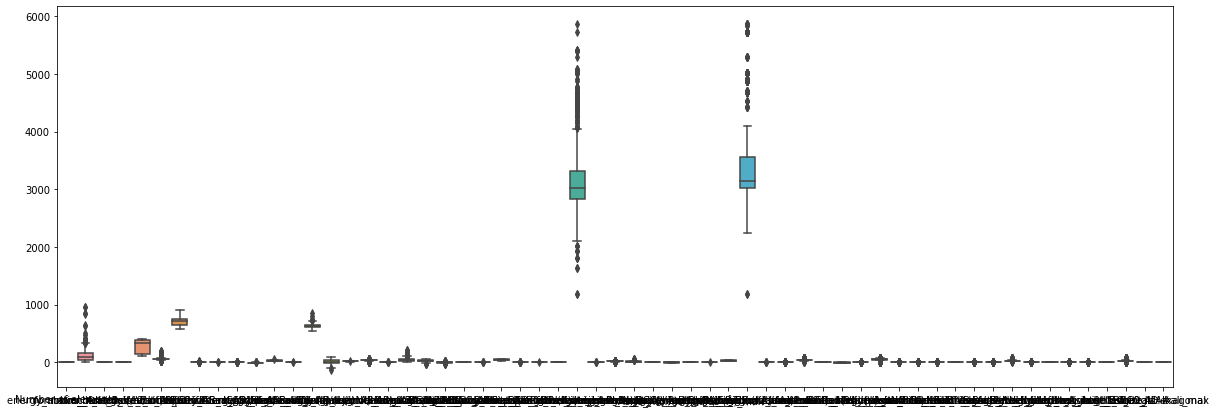

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data = df3)


a. (Bonus) tampilkan grafik berikut dengan target_variable =
'energy_above_hull (meV/atom)', terdapat batas energi hull pada nilai 40,
bagaimana analisis Anda?

In [ ]:
target_variable = 'energy_above_hull (meV/atom)'

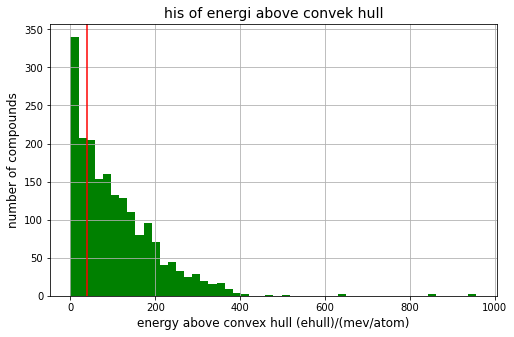

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
df3[target_variable].hist(bins=50,ax=ax,color='green')
ax.set_title('his of energi above convek hull', fontsize=14)
ax.axvline(x=40, c='red')
plt.xlabel('energy above convex hull (ehull)/(mev/atom)', fontsize = 12)
plt.ylabel('number of compounds', fontsize=12)
plt.show()

dari barchart di atas dapat di simpulkan kalau peroskive kita tidak stabil

##3

[20] Data Processing. Setelah itu membuat target kelas dengan perintah berikut

In [ ]:
class_df = df3
class_df['class'] = class_df['energy_above_hull (meV/atom)']
class_df["class"][class_df['energy_above_hull (meV/atom)']>40] = 1 #tidak stabil
class_df["class"][class_df['energy_above_hull (meV/atom)']<=40] = 0 # stabil
class_df.drop(['energy_above_hull (meV/atom)'], axis = 1, inplace=True )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
class_df


,Number of elements,formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),Density_AB_avg,BCCefflatcnt_AB_avg,BCCvolume_padiff_AB_avg,GSenergy_pa_AB_avg,...,Bsite_At. #_weighted_avg,Bsite_Period_weighted_avg,Bsite_NdUnfilled_weighted_avg,Bsite_NpUnfilled_weighted_avg,host_Asite0_IsBCC,host_Asite0_OrbitalD,host_Bsite0_At. #,host_Bsite0_IsHexagonal,Asite_IsAlkali_max,class
0,4,-2.113335,7,136.90,50.9415,650.0,4.390625,7.730568,-0.577500,-5.326081,...,23.000,4.0,7.000,0.0,0,0,23,0,1,0.0
1,5,-1.311863,4,332.63,58.9332,758.0,7.810000,7.066584,-0.228750,-5.470804,...,27.000,4.0,3.000,0.0,0,0,27,1,1,1.0
2,4,-1.435607,6,154.67,55.8470,759.3,4.967000,7.179786,-0.356250,-5.113806,...,26.000,4.0,4.000,0.0,0,0,26,0,1,1.0
3,5,-0.868639,4,332.63,58.6934,736.7,7.672500,6.929113,0.078125,-4.308582,...,28.000,4.0,2.000,0.0,0,0,28,0,1,1.0
4,4,-1.746806,6,230.00,55.8470,759.3,7.592000,7.011255,-0.011250,-6.108765,...,26.000,4.0,4.000,0.0,0,0,26,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,4,-2.438274,8,393.30,50.9415,650.0,5.464375,6.959018,0.094687,-7.585751,...,23.500,4.0,6.500,0.0,0,1,23,0,0,0.0
1925,4,-2.509888,8,393.30,50.9415,650.0,5.357500,6.966861,0.081250,-7.737334,...,23.125,4.0,6.750,0.0,0,1,23,0,0,0.0
1926,4,-2.479151,8,393.30,50.9415,650.0,5.400250,6.962176,0.082500,-7.661069,...,23.375,4.0,6.625,0.0,0,1,23,0,0,0.0
1927,4,-2.441538,8,393.30,50.9415,650.0,5.464375,6.957805,0.083125,-7.489872,...,23.625,4.0,6.375,0.0,0,1,23,0,0,0.0


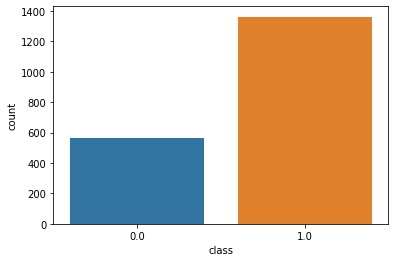

In [ ]:
sns.countplot(x='class',data=class_df)

##Split Data

Menentukan Variabel Independen (Y) dan Variabel dependent (X)

In [ ]:
X = class_df.loc[:, class_df.columns !='class']
y = class_df.loc[:, 'class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (1543, 58)
X_test : (386, 58)
y_train : (1543,)
y_test : (386,)


##Scale Data

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#ANN Model

In [ ]:
X_train.shape

(1543, 58)

Model dengan 62 input layer, 30 hidden layer dan 1 ouput layer

In [ ]:
model=Sequential()

model.add(Dense(62, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))

#sigmoid: output between 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 62)                3658      
                                                                 
 dense_7 (Dense)             (None, 30)                1890      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,579
Trainable params: 5,579
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import History 
history = History()
History = model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=150, callbacks=[history])

Epoch 1/150
49/49 [==============================] - 1s 5ms/step - loss: 0.5681 - accuracy: 0.6948 - val_loss: 0.4753 - val_accuracy: 0.7668
Epoch 2/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7570 - val_loss: 0.4266 - val_accuracy: 0.7850
Epoch 3/150
49/49 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.7745 - val_loss: 0.4001 - val_accuracy: 0.7979
Epoch 4/150
49/49 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.7900 - val_loss: 0.3806 - val_accuracy: 0.8031
Epoch 5/150
49/49 [==============================] - 0s 3ms/step - loss: 0.3986 - accuracy: 0.7984 - val_loss: 0.3768 - val_accuracy: 0.8135
Epoch 6/150
49/49 [==============================] - 0s 4ms/step - loss: 0.3894 - accuracy: 0.8010 - val_loss: 0.3586 - val_accuracy: 0.8135
Epoch 7/150
49/49 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.8056 - val_loss: 0.3475 - val_accuracy: 0.8187
Epoch 8/150
4

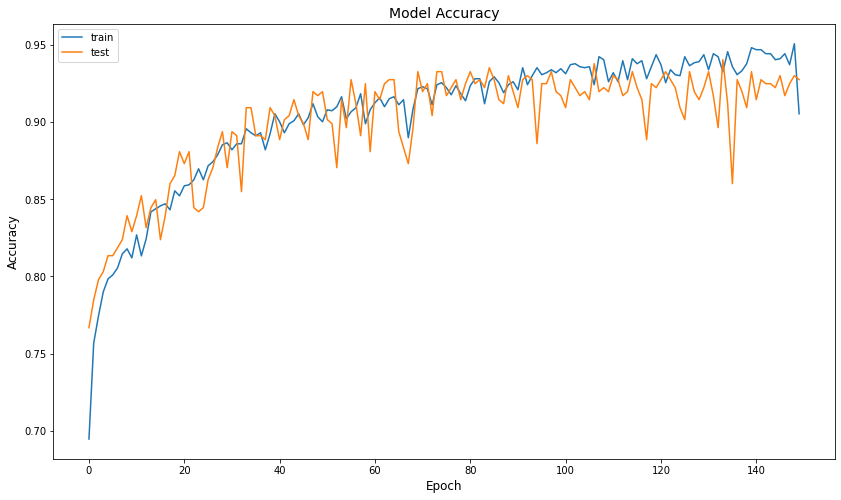

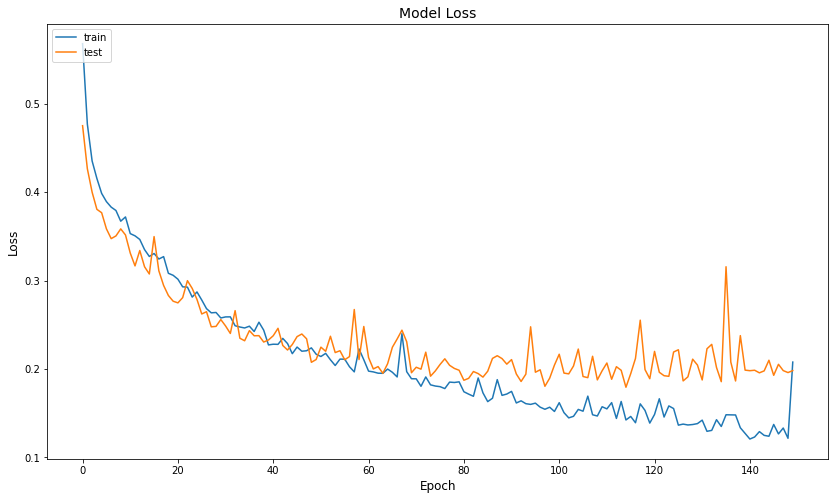

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

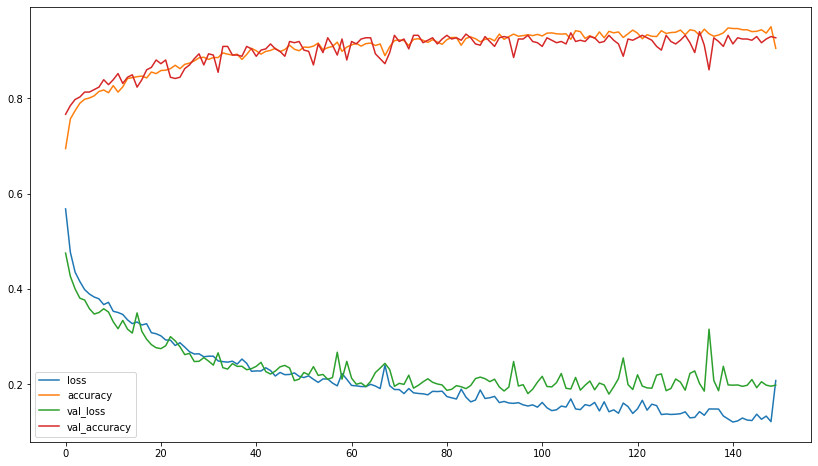

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

## Model diubah Layer

#Other Model : with early stopping

In [ ]:
model=Sequential()

model.add(Dense(62, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))

#sigmoid: output between 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 62)                3658      
                                                                 
 dense_10 (Dense)            (None, 30)                1890      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,579
Trainable params: 5,579
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
from keras.callbacks import History 
history = History()
History = model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=300,callbacks=[early_stop])

Epoch 1/300
49/49 [==============================] - 1s 6ms/step - loss: 0.5742 - accuracy: 0.6889 - val_loss: 0.4532 - val_accuracy: 0.7824
Epoch 2/300
49/49 [==============================] - 0s 3ms/step - loss: 0.4631 - accuracy: 0.7686 - val_loss: 0.4276 - val_accuracy: 0.7902
Epoch 3/300
49/49 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.7835 - val_loss: 0.3887 - val_accuracy: 0.8135
Epoch 4/300
49/49 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.7952 - val_loss: 0.3762 - val_accuracy: 0.8057
Epoch 5/300
49/49 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.7952 - val_loss: 0.3688 - val_accuracy: 0.8238
Epoch 6/300
49/49 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8043 - val_loss: 0.3648 - val_accuracy: 0.8342
Epoch 7/300
49/49 [==============================] - 0s 3ms/step - loss: 0.3760 - accuracy: 0.8134 - val_loss: 0.3489 - val_accuracy: 0.8187
Epoch 8/300
4

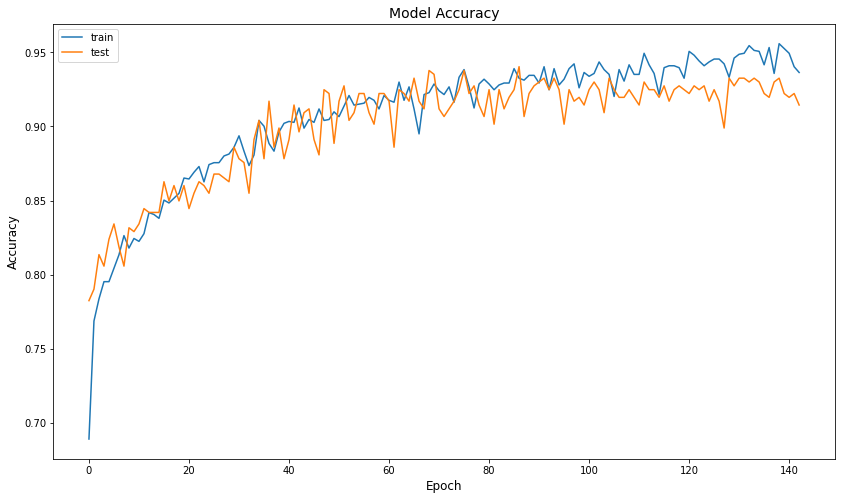

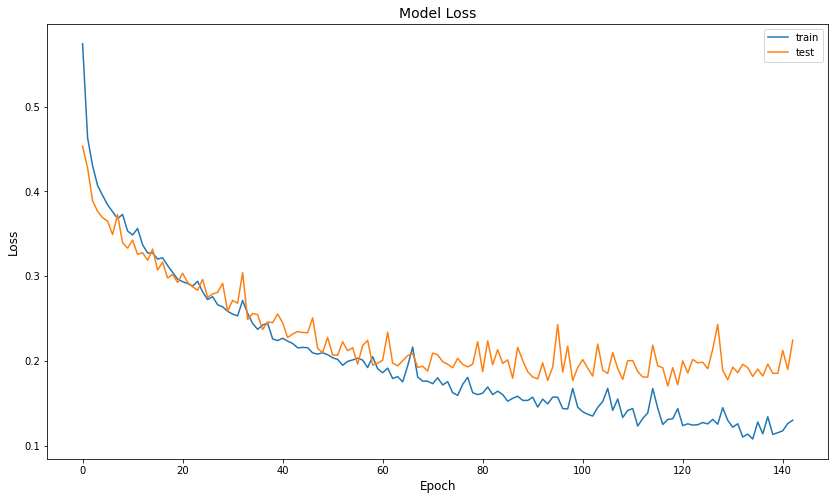

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

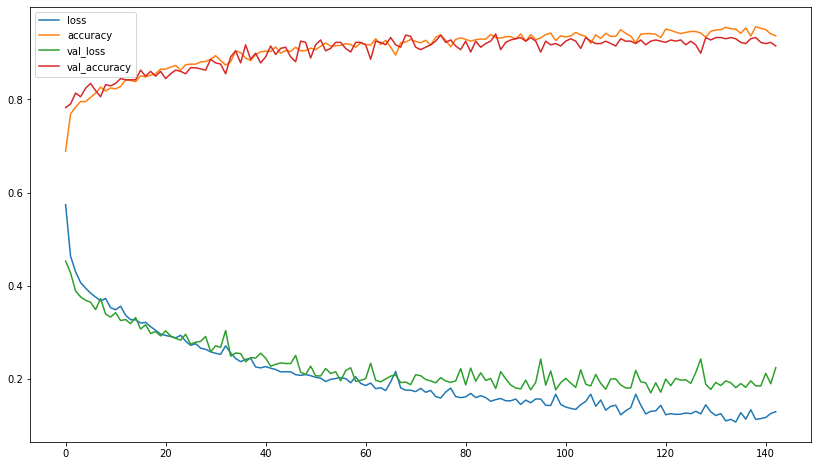

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

Model lain : Dropout Layer

In [ ]:
model=Sequential()

model.add(Dense(90, input_dim = X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(40, activation='relu'))
model.add(Dropout(0.5))

#sigmoid: output between 0 and 1
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 90)                5310      
                                                                 
 dropout (Dropout)           (None, 90)                0         
                                                                 
 dense_13 (Dense)            (None, 40)                3640      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 41        
                                                                 
Total params: 8,991
Trainable params: 8,991
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import History 
history = History()
History = model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
49/49 [==============================] - 1s 6ms/step - loss: 0.5843 - accuracy: 0.6928 - val_loss: 0.4848 - val_accuracy: 0.7435
Epoch 2/600
49/49 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7291 - val_loss: 0.4504 - val_accuracy: 0.7927
Epoch 3/600
49/49 [==============================] - 0s 3ms/step - loss: 0.4838 - accuracy: 0.7609 - val_loss: 0.4309 - val_accuracy: 0.7876
Epoch 4/600
49/49 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7647 - val_loss: 0.4225 - val_accuracy: 0.7927
Epoch 5/600
49/49 [==============================] - 0s 4ms/step - loss: 0.4581 - accuracy: 0.7544 - val_loss: 0.3985 - val_accuracy: 0.7953
Epoch 6/600
49/49 [==============================] - 0s 3ms/step - loss: 0.4342 - accuracy: 0.7699 - val_loss: 0.3880 - val_accuracy: 0.8161
Epoch 7/600
49/49 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.7822 - val_loss: 0.3874 - val_accuracy: 0.8109
Epoch 8/600
4

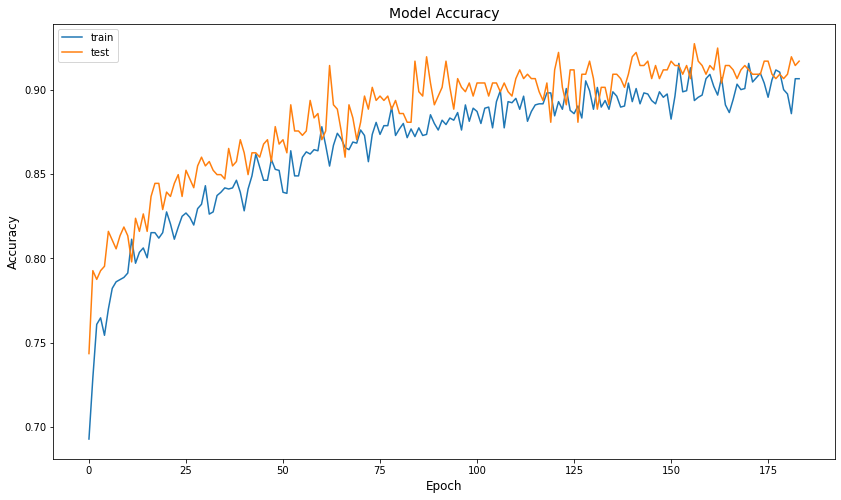

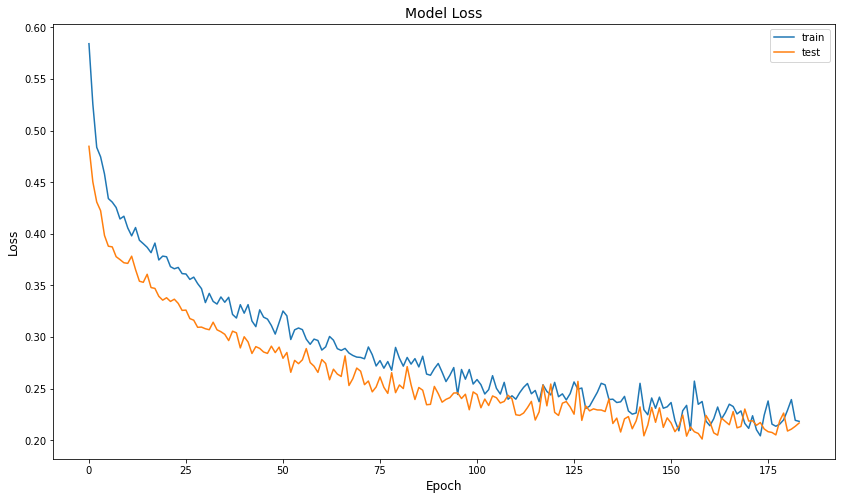

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

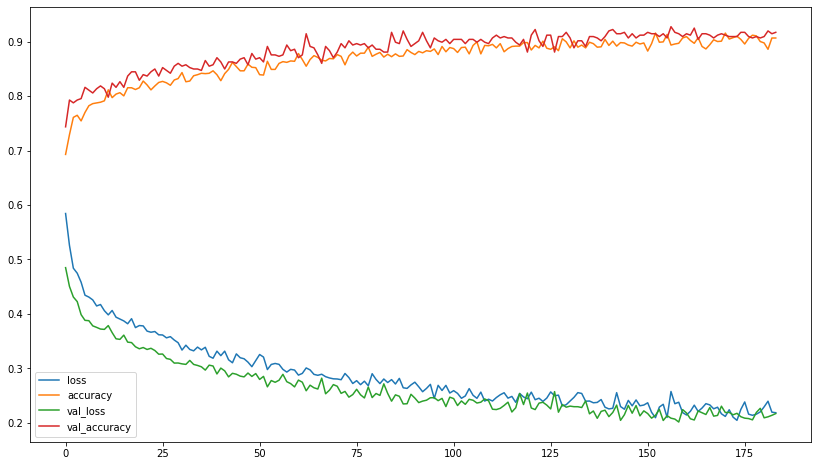

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

#Evaluating Model

In [ ]:
class_df.select_dtypes(include = "object").columns

Index([], dtype='object')

In [ ]:
preds = model.predict(X_test)

13/13 [==============================] - 0s 1ms/step


In [ ]:
preds

array([[9.9999768e-01],
       [1.0000000e+00],
       [8.8796091e-01],
       [4.0009558e-01],
       [9.7975332e-01],
       [1.0826582e-01],
       [9.7055322e-01],
       [1.4436117e-01],
       [2.2365007e-01],
       [7.0202577e-01],
       [8.6224729e-01],
       [9.5055914e-01],
       [9.9285346e-01],
       [9.9981141e-01],
       [9.9999982e-01],
       [9.9972308e-01],
       [1.1781939e-01],
       [9.9999422e-01],
       [9.9973947e-01],
       [5.9415191e-02],
       [9.9994779e-01],
       [8.0581969e-01],
       [6.6646504e-01],
       [9.9999774e-01],
       [9.9860948e-01],
       [1.2771687e-02],
       [1.0000000e+00],
       [9.9756438e-01],
       [1.5120707e-01],
       [9.7687769e-01],
       [7.1265213e-02],
       [9.8387468e-01],
       [9.9655390e-01],
       [9.9999446e-01],
       [9.8057485e-01],
       [3.2377023e-02],
       [9.9843001e-01],
       [7.6013392e-01],
       [9.9999583e-01],
       [2.1193276e-01],
       [1.0000000e+00],
       [9.680615